<font color=#2200AA size=6 face="STCAIYUN"> 資料特性分析 </font>

----------------------------原始資料----------------------------------
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
5             6        330          115                  5  4.5   3.0  9.34   
6             7        321          109                  3  3.0   4.0  8.20   
7             8        308          101                  2  3.0   4.0  7.90   
8             9        302          102                  1  2.0   1.5  8.00   
9            10        323          108                  3  3.5   3.0  8.60   
10           11        325          106                  3  3.5 

AxesSubplot(0.125,0.125;0.62x0.755)


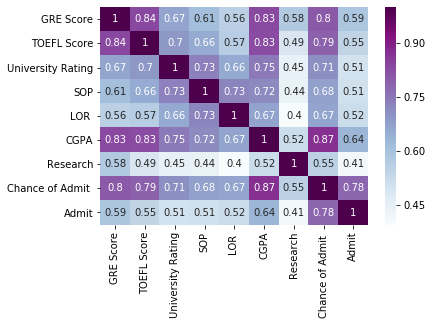

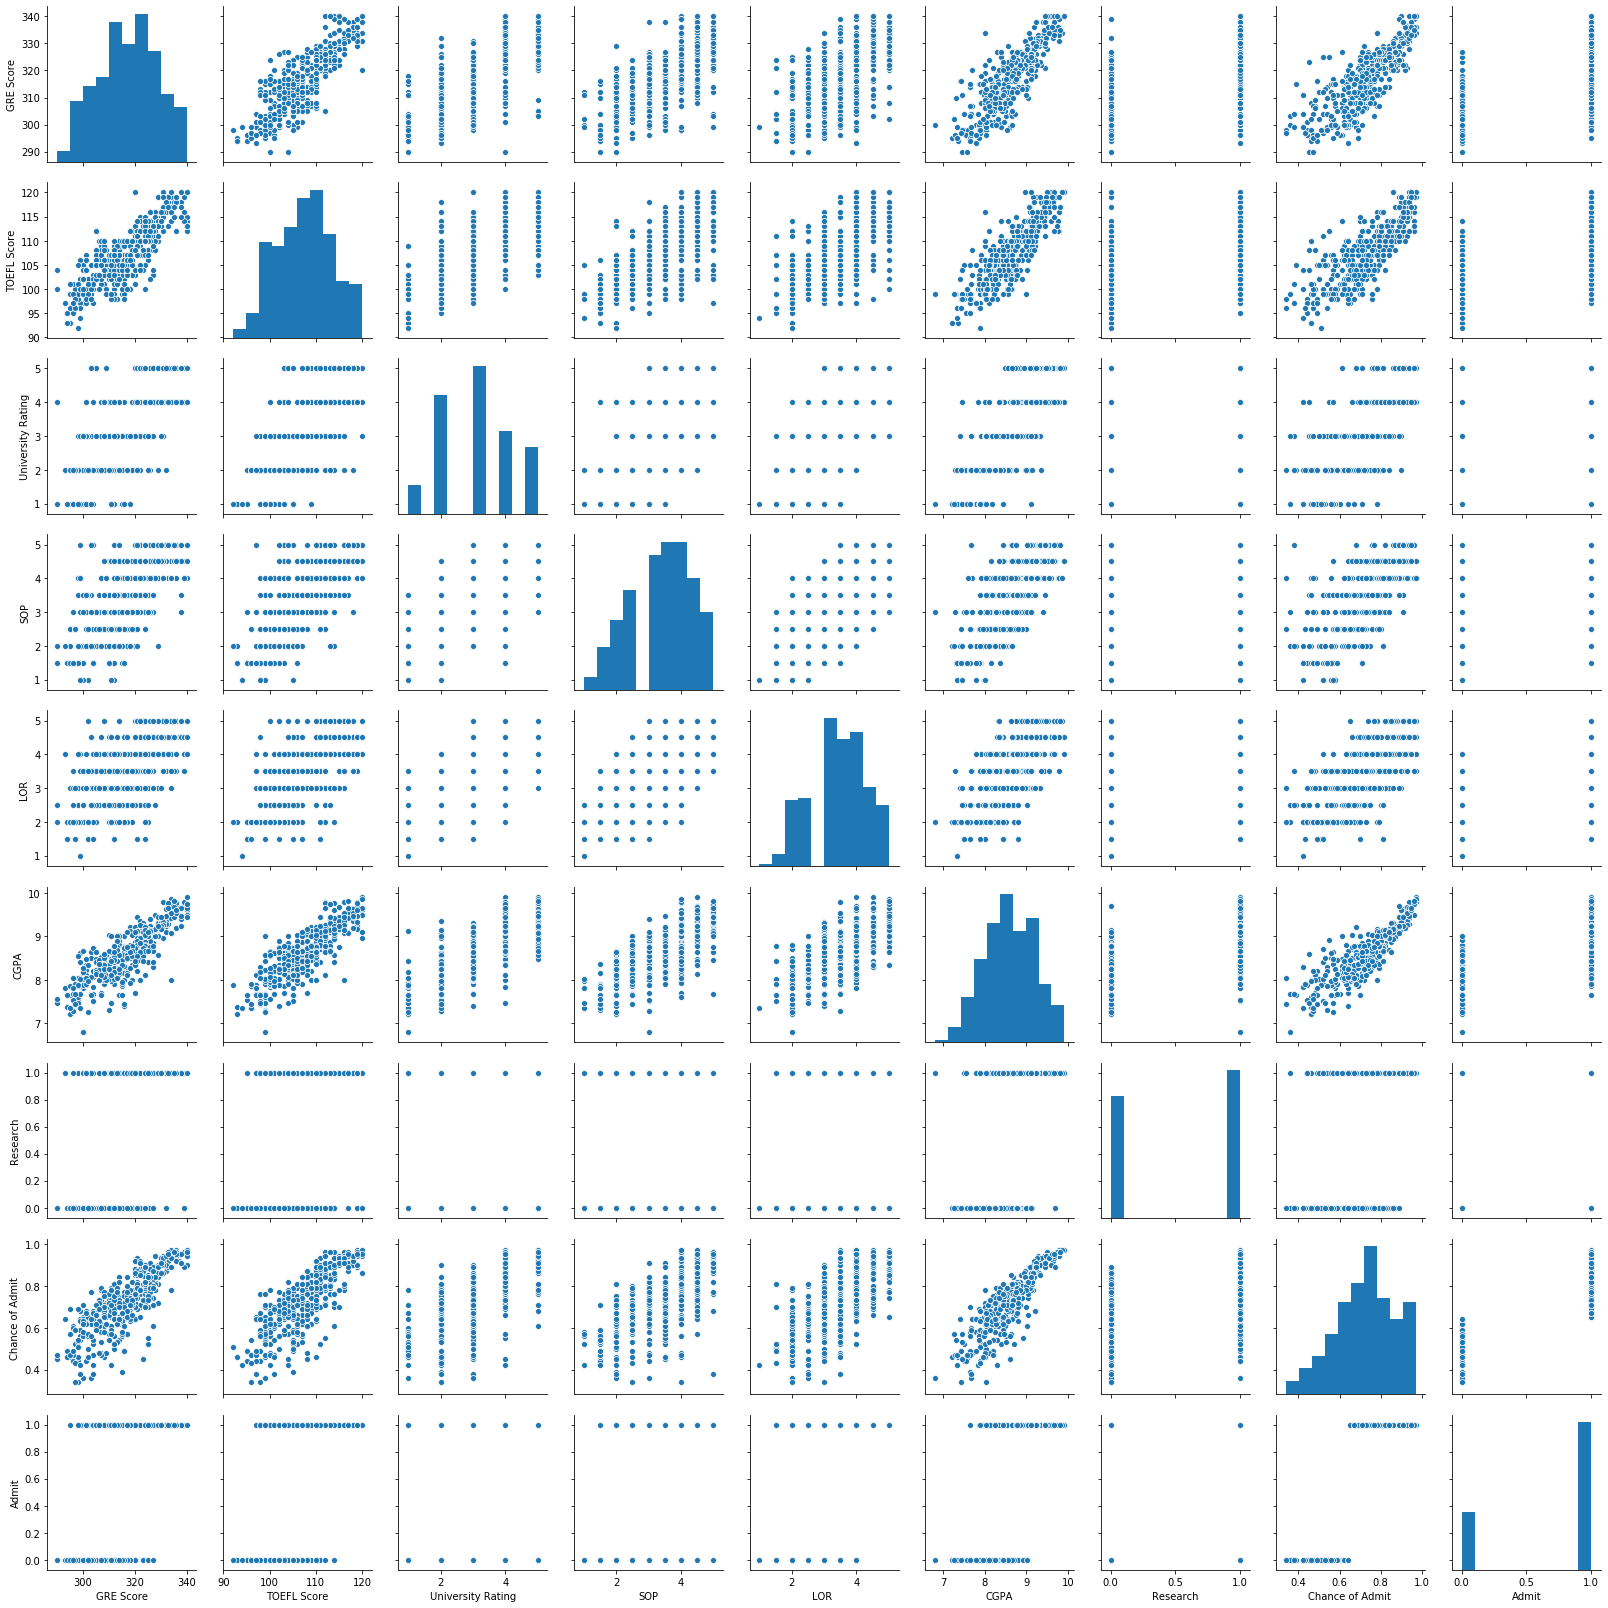

In [254]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("D:\python school\dataset.csv")
df_dropNo=df.drop("Serial No.", axis = 1)

print("----------------------------原始資料----------------------------------")
print(df)
df.info()

print("----------------------------數值描述----------------------------------")
print (df_dropNo.describe())

print("---------------------------相關係數&各值人數分布----------------------------------")
print(sns.heatmap(df_dropNo.corr(),cmap="BuPu",annot=True))
print(sns.pairplot(df_dropNo))

AxesSubplot(0.125,0.125;0.775x0.755)


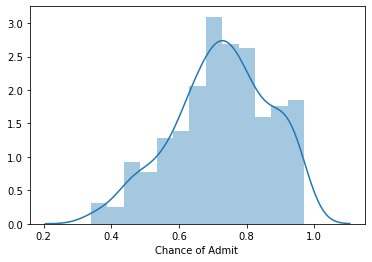

In [244]:
print(sns.distplot(df_dropNo['Chance of Admit ']))

<font color=#2200AA size=6 face="STCAIYUN"> 線性回歸分析 </font>

In [980]:
df_dropNo.columns

X = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y = df['Chance of Admit ']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

#取得截距 (y=ax+b的a)
print(lm.intercept_)

#取得迴歸係數
lm.coef_

X_train.columns
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coef'])
print(cdf)


-1.295450236094694
                       Coef
GRE Score          0.002012
TOEFL Score        0.002938
University Rating  0.009679
SOP               -0.002027
LOR                0.018897
CGPA               0.112681
Research           0.018451


[0.50167848 0.6248231  0.64432138 0.64282348 0.6944492  0.70213463
 0.79808242 0.49063897 0.85977036 0.80114104 0.78401777 0.69797727
 0.88603069 0.98255304 0.57131272 0.747547   0.70141107 0.65874174
 0.5057038  0.65022342 0.56365449 0.65264939 0.76998124 0.61960894
 0.46333037 0.80630071 0.76091947 0.7190662  0.52188408 0.82021175
 0.72652906 0.68794843 0.54720748 0.89248885 0.5234737  0.5709845
 0.6717365  0.58074569 0.71209487 0.71132015 0.63380392 0.84679575
 0.89533348 0.76179222 0.71702598 0.9531109  0.6250396  0.72624091
 0.54867717 0.69444765 0.59755508 0.90569591 0.78811058 0.52790829
 0.74492255 0.74372306 0.73015962 0.61711736 0.63597418 0.53855759
 0.51805085 0.69808661 0.55546695 0.53924086 0.72156914 0.59970211
 0.67812287 0.65073301 0.51603183 0.66228324 0.49885761 0.79031799
 0.80562415 0.7366963  0.64918213 0.96502357 0.63993543 0.86867443
 0.64765655 0.64746423]
AxesSubplot(0.125,0.125;0.775x0.755)


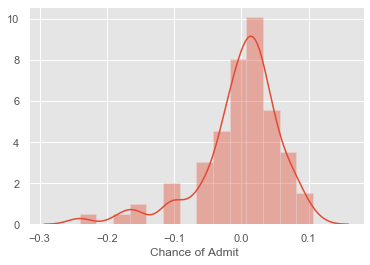

In [987]:
#測試組預測結果
predictions = lm.predict(X_test)
print(predictions)
# 實際值與預測值之間的殘差分佈圖
# print(plt.scatter(y_test,predictions))
#比較實際錄取率及預測錄取率的關係
print(sns.distplot((y_test-predictions)))

In [247]:
from sklearn import metrics

# (MAE)
print(metrics.mean_absolute_error(y_test,predictions))

# (MSE)
print(metrics.mean_squared_error(y_test,predictions))

# (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.04261381882403002
0.003692881582428962
0.06076908410062605


<font color=#2200AA size=6 face="STCAIYUN"> 分類-羅吉斯回歸 </font>

In [1009]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
X = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y = df['Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
modelLR.fit(X_train,y_train)

C:\Users\Hank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1006]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(modelLR.score(X_test,y_test))

0.795
0.815


In [996]:
modelLR.predict_proba(X)

array([[0.01502364, 0.98497636],
       [0.03919379, 0.96080621],
       [0.32265819, 0.67734181],
       [0.19213105, 0.80786895],
       [0.68399245, 0.31600755],
       [0.01472317, 0.98527683],
       [0.24455326, 0.75544674],
       [0.59473799, 0.40526201],
       [0.84892961, 0.15107039],
       [0.36071339, 0.63928661],
       [0.231186  , 0.768814  ],
       [0.03330108, 0.96669892],
       [0.02899839, 0.97100161],
       [0.17608843, 0.82391157],
       [0.27924267, 0.72075733],
       [0.41242726, 0.58757274],
       [0.22829195, 0.77170805],
       [0.34834396, 0.65165604],
       [0.19258877, 0.80741123],
       [0.17835377, 0.82164623],
       [0.41000711, 0.58999289],
       [0.35567905, 0.64432095],
       [0.00394039, 0.99605961],
       [0.00453641, 0.99546359],
       [0.00789047, 0.99210953],
       [0.00861702, 0.99138298],
       [0.04818422, 0.95181578],
       [0.64846336, 0.35153664],
       [0.94148551, 0.05851449],
       [0.93831761, 0.06168239],
       [0.

In [997]:
modelLR.predict(X)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [998]:
a=modelLR.coef_
b=modelLR.intercept_
print("------------------係數----------------------")
print(a)
print("------------------截距----------------------")
print(b)


------------------係數----------------------
[[-0.06733281  0.03625224  0.77879841  0.20819244  0.38790898  1.73871018
   0.79636046]]
------------------截距----------------------
[-0.7761795]


([<matplotlib.axis.YTick at 0x1d789d8f198>,
 <a list of 2 Text yticklabel objects>)

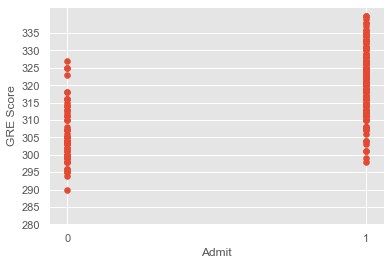

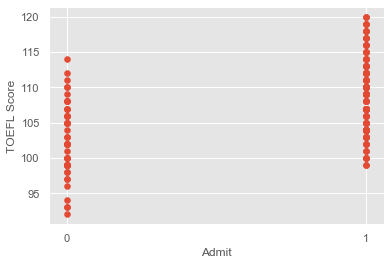

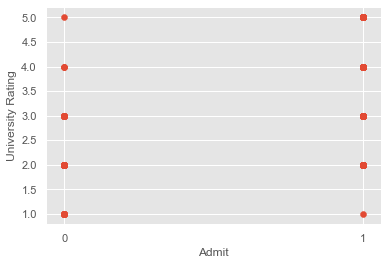

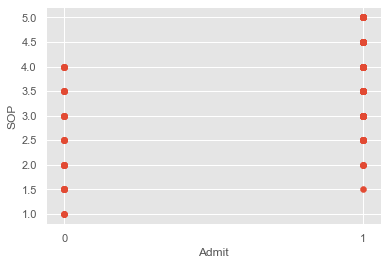

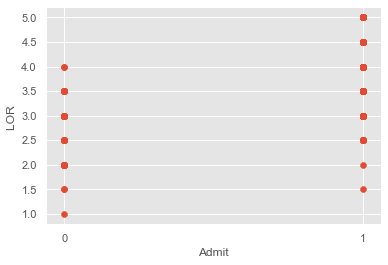

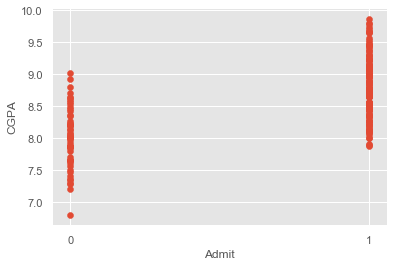

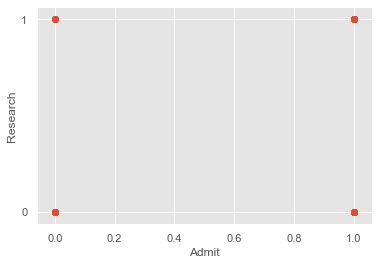

In [999]:
plt.figure(0)
plt.scatter(y_test, X_test.iloc[:,0].values)
plt.xlabel('Admit')
plt.ylabel('GRE Score')
plt.yticks(np.arange(280, 340, 5))
plt.xticks(np.arange(0, 2, 1))

plt.figure(1)
plt.scatter(y_test, X_test.iloc[:,1].values)
plt.xlabel('Admit')
plt.ylabel('TOEFL Score')
plt.xticks(np.arange(0, 2, 1))

plt.figure(2)
plt.scatter(y_test, X_test.iloc[:,2].values)
plt.xlabel('Admit')
plt.ylabel('University Rating')
plt.xticks(np.arange(0, 2, 1))

plt.figure(3)
plt.scatter(y_test, X_test.iloc[:,3].values)
plt.xlabel('Admit')
plt.ylabel('SOP')
plt.xticks(np.arange(0, 2, 1))

plt.figure(4)
plt.scatter(y_test, X_test.iloc[:,4].values)
plt.xlabel('Admit')
plt.ylabel('LOR ')
plt.xticks(np.arange(0, 2, 1))

plt.figure(5)
plt.scatter(y_test, X_test.iloc[:,5].values)
plt.xlabel('Admit')
plt.ylabel('CGPA')
plt.xticks(np.arange(0, 2, 1))

plt.figure(6)
plt.scatter(y_test, X_test.iloc[:,6].values)
plt.xlabel('Admit')
plt.ylabel('Research')
plt.yticks(np.arange(0, 2, 1))
 

(400,)
(400,)


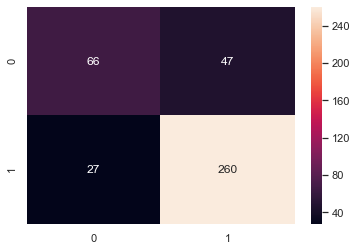

In [1000]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
sns.set()


print(modelLR.predict(X).shape)
print(y.shape)

sns.heatmap(confusion_matrix(y,modelLR.predict(X)),annot=True,fmt="d")


0.7782914784070611


<Figure size 432x288 with 0 Axes>

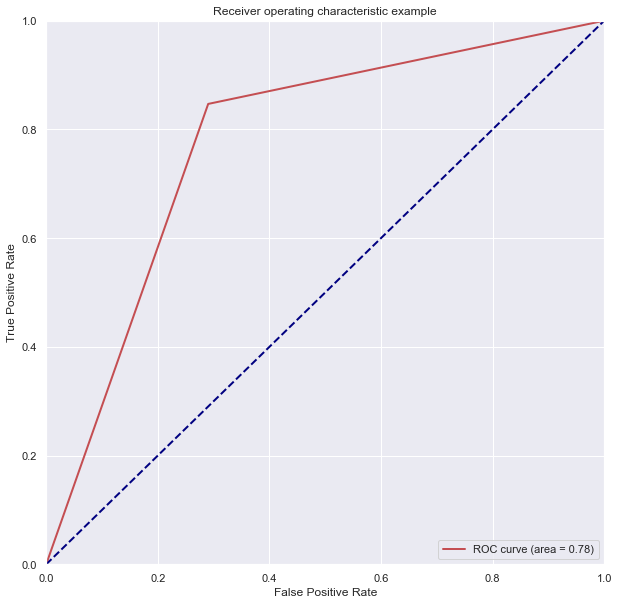

In [1001]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(modelLR.predict(X), y)
roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [1010]:
import numpy as np
import scipy as sp
from sklearn import tree
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy')
print(clf)
clf.fit(X_train, y_train)
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

print(clf.feature_importances_)
answer = clf.predict(X_train)
# print(X_train)
# print(answer)
# print(y_train)
print(np.mean( answer == y_train))


precision, recall, thresholds = precision_recall_curve(y_train, clf.predict(X_train))
answer = clf.predict_proba(X)[:,1]
print(classification_report(y, answer, target_names = ['不錄取', '會錄取']))


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[0.10971794 0.09478216 0.02043302 0.08284473 0.08336816 0.55247861
 0.05637538]
1.0
              precision    recall  f1-score   support

         不錄取       0.96      0.89      0.93       113
         會錄取       0.96      0.99      0.97       287

    accuracy                           0.96       400
   macro avg       0.96      0.94      0.95       400
weighted avg       0.96      0.96      0.96       400



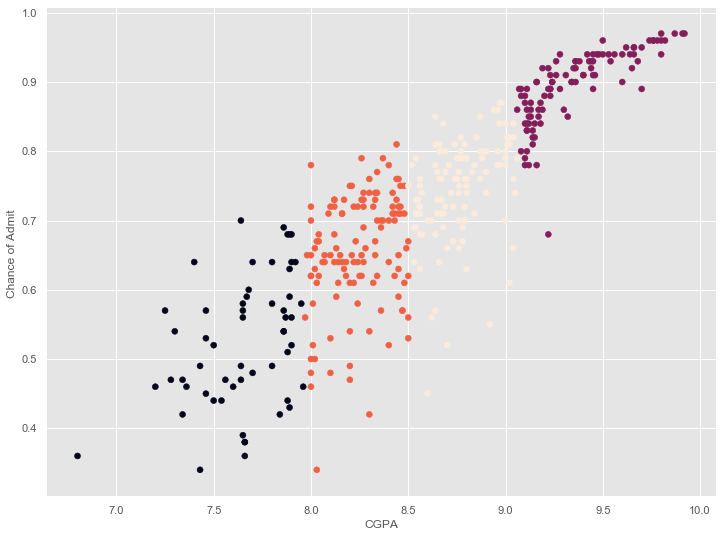

In [920]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.cluster import KMeans
import sys
              
X = df[['CGPA','Chance of Admit ']].values  

y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.figure(figsize=(12, 9))
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [896]:
from keras.models import Sequential
from keras.layers import Dense

X = df_dropNo.values[:,1:8] 

y = df_dropNo.values[:,8]

model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=5)
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy))

Epoch 1/150
400/400 [==============================] - 2s 5ms/step - loss: 0.5612 - acc: 0.7175
Epoch 2/150
400/400 [==============================] - 0s 507us/step - loss: 0.5465 - acc: 0.7175
Epoch 3/150
400/400 [==============================] - 0s 452us/step - loss: 0.5416 - acc: 0.7225
Epoch 4/150
400/400 [==============================] - 0s 470us/step - loss: 0.5222 - acc: 0.7175
Epoch 5/150
400/400 [==============================] - 0s 515us/step - loss: 0.5113 - acc: 0.7200
Epoch 6/150
400/400 [==============================] - 0s 557us/step - loss: 0.5084 - acc: 0.7225
Epoch 7/150
400/400 [==============================] - 0s 550us/step - loss: 0.4943 - acc: 0.7350
Epoch 8/150
400/400 [==============================] - 0s 590us/step - loss: 0.4821 - acc: 0.7400
Epoch 9/150
400/400 [==============================] - 0s 588us/step - loss: 0.4887 - acc: 0.7500
Epoch 10/150
400/400 [==============================] - 0s 581us/step - loss: 0.4649 - acc: 0.7600
Epoch 11/150
400/400 

400/400 [==============================] - 0s 525us/step - loss: 0.3788 - acc: 0.8075
Epoch 84/150
400/400 [==============================] - 0s 657us/step - loss: 0.3667 - acc: 0.8125
Epoch 85/150
400/400 [==============================] - 0s 820us/step - loss: 0.3665 - acc: 0.8175
Epoch 86/150
400/400 [==============================] - 0s 693us/step - loss: 0.3790 - acc: 0.8100
Epoch 87/150
400/400 [==============================] - 0s 428us/step - loss: 0.3778 - acc: 0.7900
Epoch 88/150
400/400 [==============================] - 0s 386us/step - loss: 0.3717 - acc: 0.8100
Epoch 89/150
400/400 [==============================] - 0s 352us/step - loss: 0.3756 - acc: 0.8150
Epoch 90/150
400/400 [==============================] - 0s 352us/step - loss: 0.3798 - acc: 0.7975
Epoch 91/150
400/400 [==============================] - 0s 389us/step - loss: 0.3748 - acc: 0.8075
Epoch 92/150
400/400 [==============================] - 0s 393us/step - loss: 0.3637 - acc: 0.7975
Epoch 93/150
400/400 [=

In [902]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]
predictions = model.predict_classes(X)
for i in range(80):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[118.0, 4.0, 4.5, 4.5, 9.65, 1.0, 0.92] => 1 (expected 1)
[107.0, 4.0, 4.0, 4.5, 8.87, 1.0, 0.76] => 1 (expected 1)
[104.0, 3.0, 3.0, 3.5, 8.0, 1.0, 0.72] => 1 (expected 1)
[110.0, 3.0, 3.5, 2.5, 8.67, 1.0, 0.8] => 1 (expected 1)
[103.0, 2.0, 2.0, 3.0, 8.21, 0.0, 0.65] => 0 (expected 1)
[115.0, 5.0, 4.5, 3.0, 9.34, 1.0, 0.9] => 1 (expected 1)
[109.0, 3.0, 3.0, 4.0, 8.2, 1.0, 0.75] => 1 (expected 1)
[101.0, 2.0, 3.0, 4.0, 7.9, 0.0, 0.68] => 1 (expected 1)
[102.0, 1.0, 2.0, 1.5, 8.0, 0.0, 0.5] => 0 (expected 0)
[108.0, 3.0, 3.5, 3.0, 8.6, 0.0, 0.45] => 1 (expected 0)
[106.0, 3.0, 3.5, 4.0, 8.4, 1.0, 0.52] => 1 (expected 0)
[111.0, 4.0, 4.0, 4.5, 9.0, 1.0, 0.84] => 1 (expected 1)
[112.0, 4.0, 4.0, 4.5, 9.1, 1.0, 0.78] => 1 (expected 1)
[109.0, 3.0, 4.0, 3.0, 8.0, 1.0, 0.62] => 1 (expected 0)
[104.0, 3.0, 3.5, 2.0, 8.2, 1.0, 0.61] => 1 (expected 0)
[105.0, 3.0, 3.5, 2.5, 8.3, 0.0, 0.54] => 1 (expected 0)
[107.0, 3.0, 4.0, 3.0, 8.7, 0.0, 0.66] => 1 (expected 1)
[106.0, 3.0, 4.0, 3.0, 8.0, 1

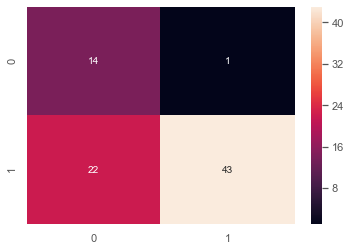

In [911]:
# print(predictions[0:80])
# print(y[0:80])
sns.heatmap((confusion_matrix(predictions[0:80], y[0:80])),annot=True,fmt="d")

0.7974358974358974


<Figure size 432x288 with 0 Axes>

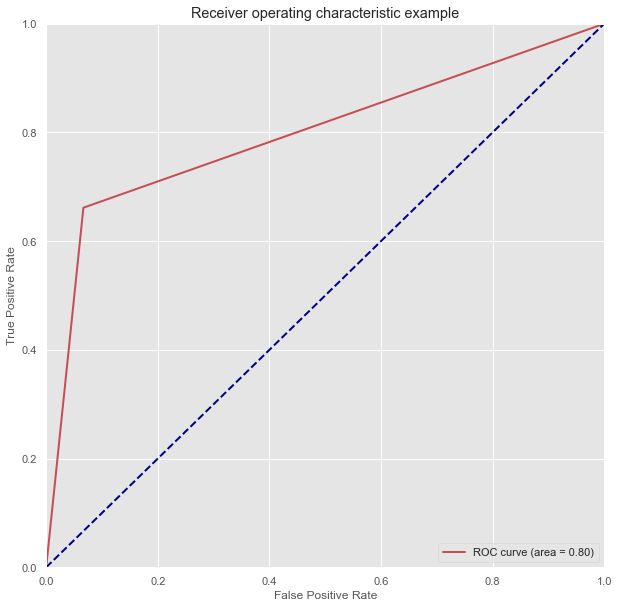

In [950]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(predictions[0:80], y[0:80])
roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()